# Moving Average Crossover Strategy
 Concept: Buy when a short-term moving average (e.g., 10-day MA) crosses above a long-term moving average (e.g., 50-day MA), and sell when it crosses below.

* Type: Trend-following

* Assets: Stocks, ETFs, crypto

* Pros: Simple, widely used

* Cons: Can produce whipsaws in sideways markets



## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

%load_ext autoreload
%autoreload 2

## Load Data From YFinance

In [2]:
df_aapl = yf.download('AAPL', start='2018-01-01')

df_aapl = df_aapl.droplevel(axis=1, level=1)

df_aapl.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,40.426819,40.436208,39.722764,39.933983,102223600
2018-01-03,40.419785,40.964255,40.356422,40.490191,118071600
2018-01-04,40.607525,40.710787,40.384575,40.492528,89738400
2018-01-05,41.069870,41.156702,40.612235,40.703762,94640000
2018-01-08,40.917301,41.213003,40.818730,40.917301,82271200


## Generate Trading Signals

In [3]:
# Short Signal
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()

# Long Signal
df_aapl['SMA200'] = df_aapl['Close'].rolling(window=200).mean()

# Drop rows where signals are missing due to lack of data
df_aapl.dropna(inplace=True)

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Date,,,,,,,
2018-10-16,52.733971,52.933373,51.454492,51.969607,116736000,52.139060,44.800210
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606
2018-10-18,51.278828,52.161882,50.561939,51.715606,130325200,52.254418,44.914901
2018-10-19,52.059811,52.522701,51.613535,51.763086,132314800,52.307401,44.972163
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369689,45.028703


In [4]:
# If the short signal rises above the long signal, then we are in a buying position
df_aapl['Signal'] = (df_aapl['SMA50'] > df_aapl['SMA200']) * 1

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Date,,,,,,,,
2018-10-16,52.733971,52.933373,51.454492,51.969607,116736000,52.139060,44.800210,1
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1
2018-10-18,51.278828,52.161882,50.561939,51.715606,130325200,52.254418,44.914901,1
2018-10-19,52.059811,52.522701,51.613535,51.763086,132314800,52.307401,44.972163,1
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369689,45.028703,1


In [5]:
markers = df_aapl['Signal'].diff().fillna(df_aapl['Signal'].iloc[0])
buy_markers = markers[markers == 1]
sell_markers = markers[markers == -1]
buy_markers, sell_markers

(Date
 2018-10-16    1.0
 2019-05-06    1.0
 2022-09-26    1.0
 2023-03-22    1.0
 2024-06-13    1.0
 Name: Signal, dtype: float64,
 Date
 2018-12-21   -1.0
 2022-06-03   -1.0
 2022-10-07   -1.0
 2024-03-14   -1.0
 2025-04-07   -1.0
 Name: Signal, dtype: float64)

In [6]:
df_aapl.index[0].timestamp()

1539648000.0

In [7]:
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Date,,,,,,,,
2018-10-16,52.733971,52.933373,51.454492,51.969607,116736000,52.139060,44.800210,1
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1
2018-10-18,51.278828,52.161882,50.561939,51.715606,130325200,52.254418,44.914901,1
2018-10-19,52.059811,52.522701,51.613535,51.763086,132314800,52.307401,44.972163,1
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369689,45.028703,1
...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961616,0
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0


In [8]:
buy_markers.index

DatetimeIndex(['2018-10-16', '2019-05-06', '2022-09-26', '2023-03-22',
               '2024-06-13'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
markers = markers[markers!=0]
markers

Date
2018-10-16    1.0
2018-12-21   -1.0
2019-05-06    1.0
2022-06-03   -1.0
2022-09-26    1.0
2022-10-07   -1.0
2023-03-22    1.0
2024-03-14   -1.0
2024-06-13    1.0
2025-04-07   -1.0
Name: Signal, dtype: float64

In [10]:
markers.index[3]

Timestamp('2022-06-03 00:00:00')

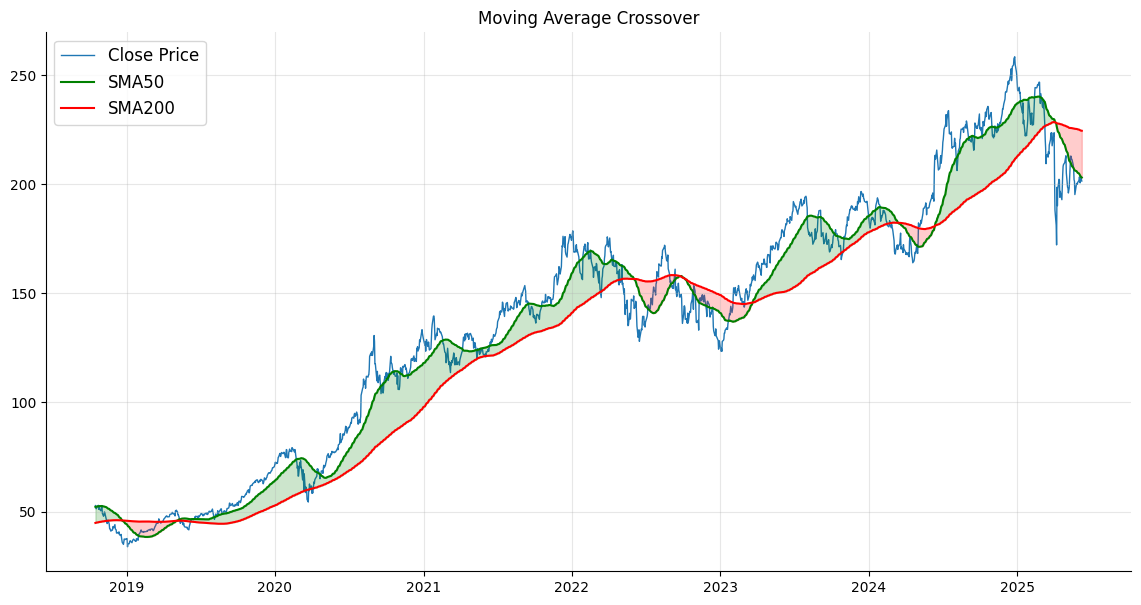

In [11]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.plot(df_aapl['SMA50'], label='SMA50', color='Green', alpha=1, zorder=2)
ax.plot(df_aapl['SMA200'], label='SMA200', color='Red', alpha=1, zorder=3)
# ax.scatter(x=buy_markers.index, y=df_aapl['Close'].loc[buy_markers.index], marker='^', s=100, color='Green', label='Buy Signal', zorder=4)
# ax.scatter(x=sell_markers.index, y=df_aapl['Close'].loc[sell_markers.index], marker='v', s=100, color='Red', label='Sell Signal', zorder=5)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

for i in range(len(markers)):

    if i != len(markers) - 1:
        if markers.iloc[i] == 1:
            ax.fill_between(df_aapl[markers.index[i]:markers.index[i+1]].index,
                            df_aapl['SMA50'][markers.index[i]:markers.index[i+1]],
                            df_aapl['SMA200'][markers.index[i]:markers.index[i+1]],
                            where=(df_aapl['SMA50'][markers.index[i]:markers.index[i+1]] > df_aapl['SMA200'][markers.index[i]:markers.index[i+1]]),
                            color='Green',
                            alpha=0.2)
        else:
                    ax.fill_between(df_aapl[markers.index[i]:markers.index[i+1]].index,
                            df_aapl['SMA50'][markers.index[i]:markers.index[i+1]],
                            df_aapl['SMA200'][markers.index[i]:markers.index[i+1]],
                            where=(df_aapl['SMA50'][markers.index[i]:markers.index[i+1]] < df_aapl['SMA200'][markers.index[i]:markers.index[i+1]]),
                            color='Red',
                            alpha=0.2)
    else:
        if markers.iloc[i] == 1:
            ax.fill_between(df_aapl[markers.index[i]:].index,
                            df_aapl['SMA50'][markers.index[i]:],
                            df_aapl['SMA200'][markers.index[i]:],
                            where=(df_aapl['SMA50'][markers.index[i]:] > df_aapl['SMA200'][markers.index[i]:]),
                            color='Green',
                            alpha=0.2)
        else:
            ax.fill_between(df_aapl[markers.index[i]:].index,
                    df_aapl['SMA50'][markers.index[i]:],
                    df_aapl['SMA200'][markers.index[i]:],
                    where=(df_aapl['SMA50'][markers.index[i]:] < df_aapl['SMA200'][markers.index[i]:]),
                    color='Red',
                    alpha=0.2) 
          

ax.legend(loc='upper left', fontsize=12)

plt.show;

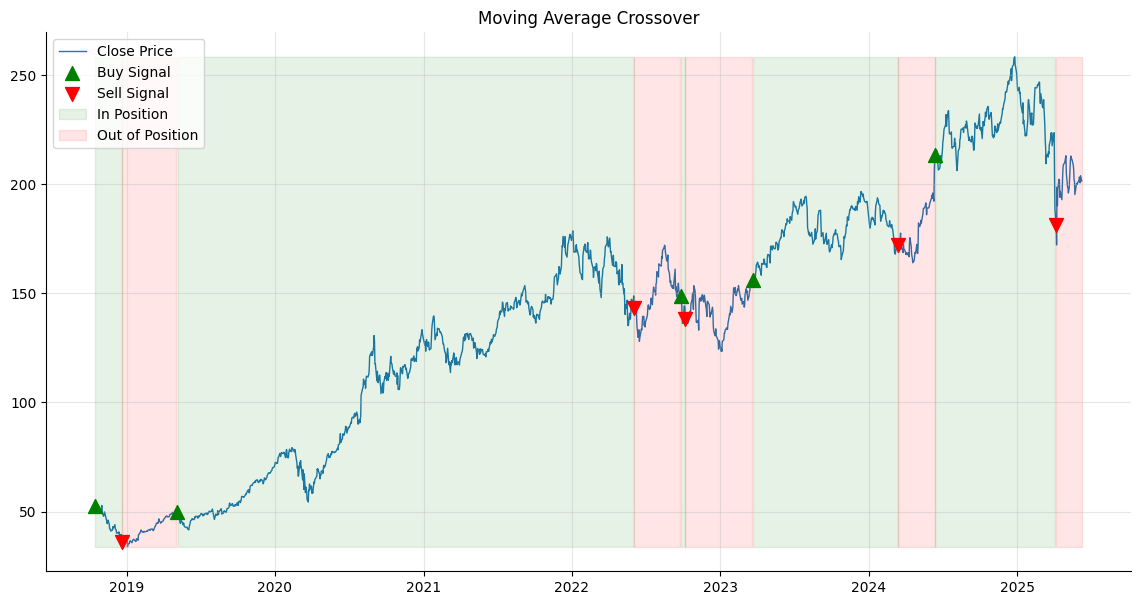

In [12]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
# ax.plot(df_aapl['SMA50'], label='SMA50', color='Green', alpha=0.5, zorder=2)
# ax.plot(df_aapl['SMA200'], label='SMA200', color='Red', alpha=0.5, zorder=3)
ax.scatter(x=buy_markers.index, y=df_aapl['Close'].loc[buy_markers.index], marker='^', s=100, color='Green', label='Buy Signal', zorder=4)
ax.scatter(x=sell_markers.index, y=df_aapl['Close'].loc[sell_markers.index], marker='v', s=100, color='Red', label='Sell Signal', zorder=5)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)



for i in range(len(markers)):

    if i != len(markers) - 1:
        if markers.iloc[i] == 1:
            ax.fill_between(df_aapl[markers.index[i]:markers.index[i+1]].index,
                            df_aapl['Close'].max(),
                            df_aapl['Close'].min(),
                            where=(df_aapl['SMA50'][markers.index[i]:markers.index[i+1]] > df_aapl['SMA200'][markers.index[i]:markers.index[i+1]]),
                            color='Green',
                            alpha=0.1,
                            label='In Position')
        else:
                    ax.fill_between(df_aapl[markers.index[i]:markers.index[i+1]].index,
                            df_aapl['Close'].max(),
                            df_aapl['Close'].min(),
                            where=(df_aapl['SMA50'][markers.index[i]:markers.index[i+1]] < df_aapl['SMA200'][markers.index[i]:markers.index[i+1]]),
                            color='Red',
                            alpha=0.1,
                            label="Out of Position")
    else:
        if markers.iloc[i] == 1:
            ax.fill_between(df_aapl[markers.index[i]:].index,
                            df_aapl['Close'].max(),
                            df_aapl['Close'].min(),
                            where=(df_aapl['SMA50'][markers.index[i]:] > df_aapl['SMA200'][markers.index[i]:]),
                            color='Green',
                            alpha=0.1)
        else:
            ax.fill_between(df_aapl[markers.index[i]:].index,
                            df_aapl['Close'].max(),
                            df_aapl['Close'].min(),
                            where=(df_aapl['SMA50'][markers.index[i]:] < df_aapl['SMA200'][markers.index[i]:]),
                            color='Red',
                            alpha=0.1) 
          

# Prevents duplicate keys being added to the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show;

## Calculate Returns

In [13]:
df_aapl['Position'] = df_aapl['Signal'].shift(1)
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position
Date,,,,,,,,,
2018-10-16,52.733971,52.933373,51.454492,51.969607,116736000,52.139060,44.800210,1,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0
2018-10-18,51.278828,52.161882,50.561939,51.715606,130325200,52.254418,44.914901,1,1.0
2018-10-19,52.059811,52.522701,51.613535,51.763086,132314800,52.307401,44.972163,1,1.0
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369689,45.028703,1,1.0
...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961616,0,0.0
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0


In [14]:
df_aapl['Daily_Ret'] = df_aapl['Close'].pct_change()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret
Date,,,,,,,,,,
2018-10-16,52.733971,52.933373,51.454492,51.969607,116736000,52.139060,44.800210,1,NaN,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0,-0.004321
2018-10-18,51.278828,52.161882,50.561939,51.715606,130325200,52.254418,44.914901,1,1.0,-0.023374
2018-10-19,52.059811,52.522701,51.613535,51.763086,132314800,52.307401,44.972163,1,1.0,0.015230
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369689,45.028703,1,1.0,0.006110
...,...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961616,0,0.0,0.007784
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0,-0.002214
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0,-0.010798


In [15]:
df_aapl['Strategy_Ret'] = df_aapl['Position'] * df_aapl['Daily_Ret']
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret
Date,,,,,,,,,,,
2018-10-16,52.733971,52.933373,51.454492,51.969607,116736000,52.139060,44.800210,1,NaN,NaN,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0,-0.004321,-0.004321
2018-10-18,51.278828,52.161882,50.561939,51.715606,130325200,52.254418,44.914901,1,1.0,-0.023374,-0.023374
2018-10-19,52.059811,52.522701,51.613535,51.763086,132314800,52.307401,44.972163,1,1.0,0.015230,0.015230
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369689,45.028703,1,1.0,0.006110,0.006110
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961616,0,0.0,0.007784,0.000000
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0,-0.002214,-0.000000
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0,-0.010798,-0.000000


In [16]:
df_aapl['Daily_Cum_Returns'] = (1 + df_aapl['Daily_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns
Date,,,,,,,,,,,,
2018-10-16,52.733971,52.933373,51.454492,51.969607,116736000,52.139060,44.800210,1,NaN,NaN,NaN,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0,-0.004321,-0.004321,0.995679
2018-10-18,51.278828,52.161882,50.561939,51.715606,130325200,52.254418,44.914901,1,1.0,-0.023374,-0.023374,0.972406
2018-10-19,52.059811,52.522701,51.613535,51.763086,132314800,52.307401,44.972163,1,1.0,0.015230,0.015230,0.987216
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369689,45.028703,1,1.0,0.006110,0.006110,0.993248
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961616,0,0.0,0.007784,0.000000,3.854631
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0,-0.002214,-0.000000,3.846098
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0,-0.010798,-0.000000,3.804569


In [17]:
df_aapl['Strategy_Cum_Returns'] = (1 + df_aapl['Strategy_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2018-10-16,52.733971,52.933373,51.454492,51.969607,116736000,52.139060,44.800210,1,NaN,NaN,NaN,NaN,NaN
2018-10-17,52.506096,52.850296,52.066941,52.769588,91541600,52.209343,44.860606,1,1.0,-0.004321,-0.004321,0.995679,0.995679
2018-10-18,51.278828,52.161882,50.561939,51.715606,130325200,52.254418,44.914901,1,1.0,-0.023374,-0.023374,0.972406,0.972406
2018-10-19,52.059811,52.522701,51.613535,51.763086,132314800,52.307401,44.972163,1,1.0,0.015230,0.015230,0.987216,0.987216
2018-10-22,52.377903,53.021204,51.971985,52.173756,115168400,52.369689,45.028703,1,1.0,0.006110,0.006110,0.993248,0.993248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600,204.669819,224.961616,0,0.0,0.007784,0.000000,3.854631,1.699718
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000,204.317401,224.856052,0,0.0,-0.002214,-0.000000,3.846098,1.699718
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0,-0.010798,-0.000000,3.804569,1.699718


## Analysis of Strategy Performance

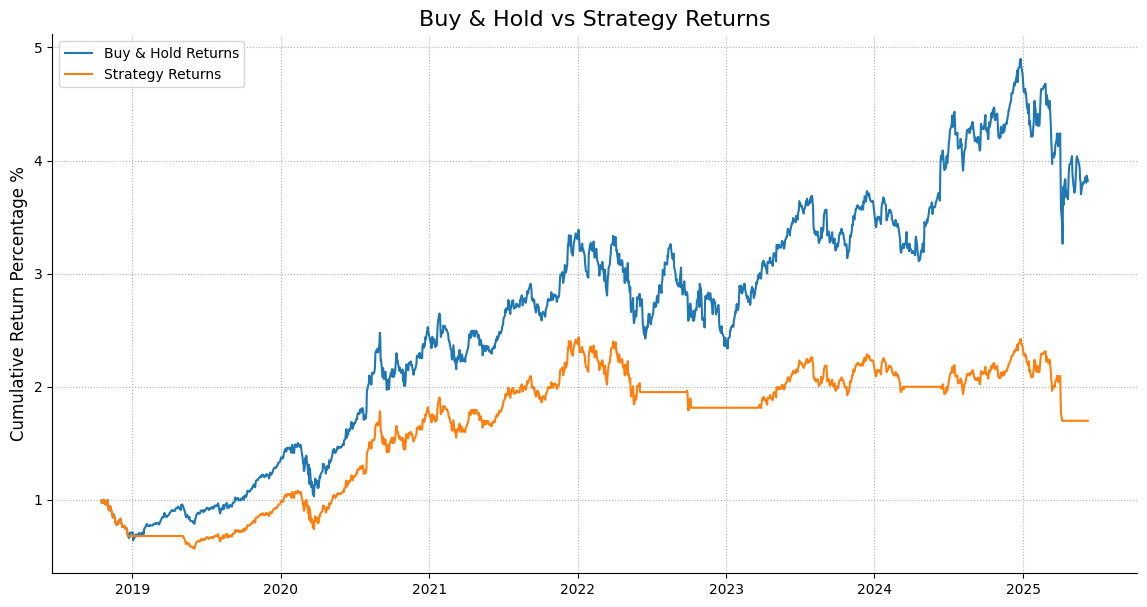

In [18]:
fig, ax = plt.subplots(figsize=(14,7))
# ax.plot(df_aapl['Close'])
ax.set_title("Buy & Hold vs Strategy Returns", fontsize=16)
ax.set_ylabel("Cumulative Return Percentage %", fontsize=12)
ax.plot(df_aapl['Daily_Cum_Returns'], label='Buy & Hold Returns')
ax.plot(df_aapl['Strategy_Cum_Returns'], label='Strategy Returns')
ax.grid(alpha=1, linestyle=":")
ax.spines[["top", "right"]].set(visible=False)
ax.legend()

plt.show;

## Risk / Return

In [19]:
# Our return is the average daily return on investment
# Our risk is how far this is likely to swing from day to day, i.e. volatility
summary = df_aapl[["Daily_Ret", "Strategy_Ret"]].agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary

,Return,Risk
Price,,
Daily_Ret,0.001009,0.020274
Strategy_Ret,0.000470,0.017393


In [20]:
# Annualizing risk and reward
# There are roughly 252 business days per year
ann_summary = summary * (252, np.sqrt(252))
ann_summary

,Return,Risk
Price,,
Daily_Ret,0.254148,0.321838
Strategy_Ret,0.118338,0.276113


## Sharpe Ratio

In [21]:
# The risk free return is the return on an investment that is deemed to be risk free
# These are usually government bonds given by stable countries such as the US, Germany, or the UK
risk_free_return = 0.017

In [22]:
# The Sharpe ratio compares investment reward against risk
# The higher the Sharpe ratio, the better the investment as the reward to risk ratio is stronger
ann_summary["Sharpe"] = (ann_summary["Return"] - risk_free_return) / ann_summary["Risk"]
ann_summary

,Return,Risk,Sharpe
Price,,,
Daily_Ret,0.254148,0.321838,0.736856
Strategy_Ret,0.118338,0.276113,0.367015


* Our Strategy isn't a very good one, we would have been better to buy and hold the AAPL stock instead of trying to trade it using this method.
* Whilst our strategy is slightly less risky, the returns are much worse.
* I believe that this is due to missing out on initial price movements as the trend lines we use to signal trades lag behind actual price movements

## Backtesting through rolling windows

In [48]:
# We are creating windows in time of 1 year moving along month by month
window_size=252
step=21
windows=[]
for i in range(0, len(df_aapl) - window_size, step):
    windows.append(df_aapl[i:i+window_size])

In [51]:
windows[10]

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2019-08-19,50.707745,51.281474,50.630602,50.772829,97654400,48.538254,44.425743,1,1.0,0.018644,0.018644,0.961576,0.692246
2019-08-20,50.710152,51.430933,50.700511,50.835506,107537200,48.627491,44.419529,1,1.0,0.000047,0.000047,0.961622,0.692279
2019-08-21,51.259766,51.503239,51.009061,51.344139,86141600,48.717009,44.412075,1,1.0,0.010838,0.010838,0.972044,0.699782
2019-08-22,51.216381,51.693686,50.804161,51.392356,89014800,48.808638,44.421899,1,1.0,-0.000846,-0.000846,0.971222,0.699190
2019-08-23,48.849121,51.117530,48.453777,50.485941,187272000,48.853113,44.426877,1,1.0,-0.046221,-0.046221,0.926331,0.666873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-11,106.511757,109.537906,106.251258,109.038826,187902400,91.380584,74.622565,1,1.0,-0.029740,-0.029740,2.019794,1.454064
2020-08-12,110.051613,110.309675,107.410120,107.604881,165598000,92.010072,74.875615,1,1.0,0.033234,0.033234,2.086921,1.502389
2020-08-13,111.999229,113.004701,110.945063,111.434411,210082000,92.669861,75.135427,1,1.0,0.017697,0.017697,2.123854,1.528978


In [84]:
backtest_results = []

for window in windows:
    summary = window[["Daily_Ret", "Strategy_Ret"]].agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    ann_summary = summary * (252, np.sqrt(252))
    ann_summary["Sharpe"] = (ann_summary["Return"] - risk_free_return) / ann_summary["Risk"]

    backtest_results.append([window.index[0], ann_summary["Sharpe"].iloc[0], ann_summary["Sharpe"].iloc[1]])

In [91]:
df_backtest = pd.DataFrame(backtest_results, columns=["Window Start", "Daily Sharpe", "Strategy Sharpe"])
df_backtest.set_index("Window Start", inplace=True)
df_backtest

,Daily Sharpe,Strategy Sharpe
Window Start,,
2018-10-16,0.323992,-0.980173
2018-11-14,1.190455,0.033656
2018-12-17,2.024967,1.058796
2019-01-17,3.096152,2.125519
2019-02-19,2.760262,2.049133
...,...,...
2024-01-22,0.739453,-0.305390
2024-02-21,1.335540,0.483812
2024-03-21,0.926254,0.181742


<Axes: xlabel='Window Start'>

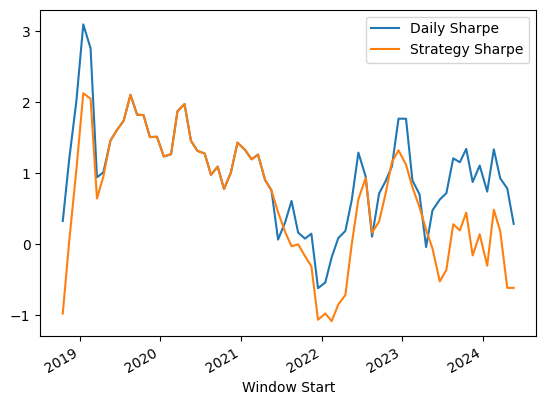

In [99]:
df_backtest.plot()

## Applying recency weighting to backtesting

## Paramenter Optimization using a gridsearch